# Monte Carlo Integration Algorithm

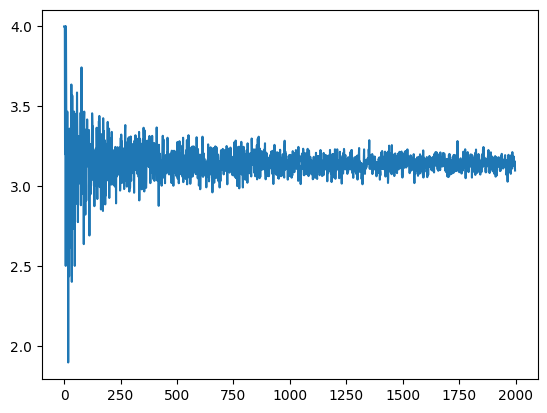

In [1]:
from numpy import random
import matplotlib.pyplot as plt
def integrate_circle(radius,throws=100):
    counter = 0
    i = 0
    while i < throws:
        if random.uniform(-radius, radius)**2 + random.uniform(-radius, radius)**2 <= radius**2:
            counter += 1
        i += 1

    area = (((2*radius)**2)* counter)/throws
    return area

areas = []

for i in range(1,2000):
    #if i%10:
        #print(str(i) + "/1000")
    areas.append(integrate_circle(1, i))

plt.plot(areas)
plt.show()

std: 0.04864448496498616
mean: -0.00014751752187715518


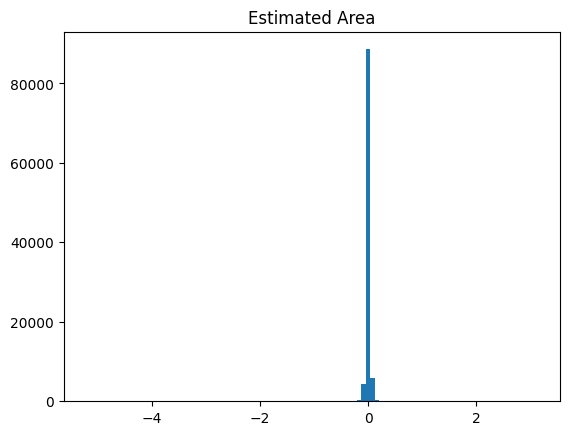

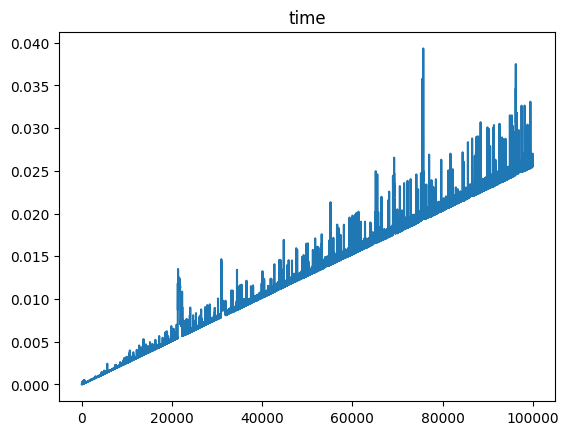

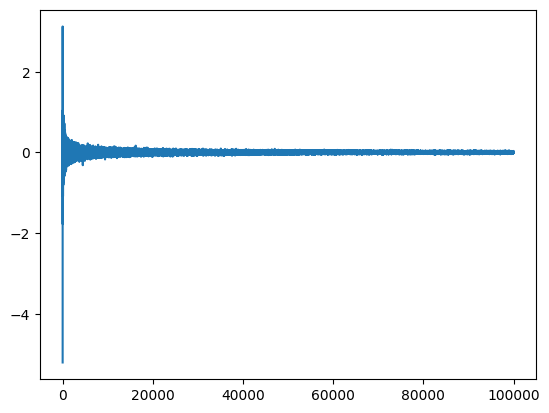

In [247]:
#from numpy import random
import random
import matplotlib.pyplot as plt
import math
import time
import statistics

# function = []
# for x in range(10):
#     function.append(math.sin(x))

# plt.plot(function)
# plt.show()

def sinfunc(x):
    return math.sin(x)

def xyfunc(x):
    return math.e**x

def MC1Dintegrate(func,randomObj,arange:list, interations=100):
    i = 0
    integral = 0.0
    while i < interations:
        integral += func(randomObj.uniform(arange[0], arange[1]))
        i += 1

    return ((arange[1]-arange[0])/interations)*integral 
                         
areas = []
errors = []
times = []
trueArea = 0
local_random = random.Random(0)
for i in range(1,100000):
    calculatedArea = 0
    error = 0
    start = time.process_time()
    calculatedArea = MC1Dintegrate(sinfunc, local_random, [0,2*math.pi], i)
    times.append(time.process_time() - start)
    error = calculatedArea - trueArea
    areas.append(calculatedArea)
    errors.append(error)

print("std:", statistics.stdev(areas))
print("mean:", statistics.mean(areas))
plt.hist(areas,bins=100)
plt.title("Estimated Area")
#print(integrate(xyfunc,[0,1], 10))
plt.show()
plt.plot(times)
plt.title("time")
plt.show()
plt.plot(errors)
plt.show()

# Monte Carlo Integration Multi Threaded

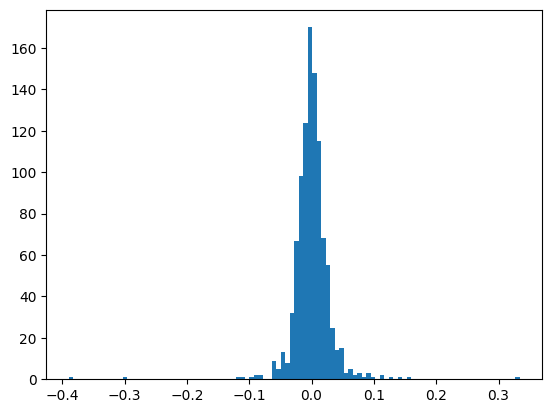

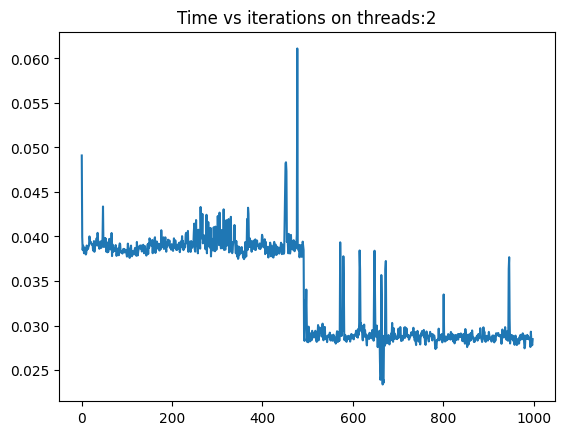

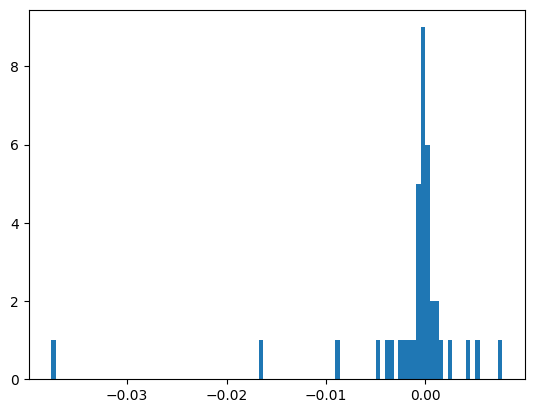

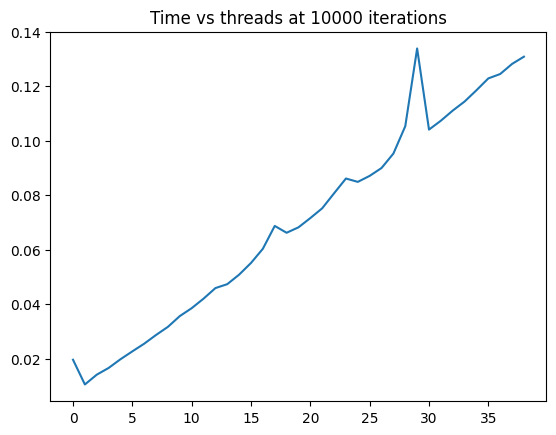

In [249]:
import multiprocessing
from itertools import product
import numpy as np

THREADS = 2

def MCMTIntegration(func, arange:list, iterations=100, threads=2):
    ranges = np.linspace(arange[0], arange[1], threads+1, dtype=float)
    #print((arange[0]+arange[1])/2)
    #print(ranges)

    with multiprocessing.Pool(processes=threads) as pool:
        args =[]
        for thread in range(threads):
            args.append([func,random.Random(), [ranges[thread],ranges[thread+1]], iterations])
        #print(args)
        #print(pool.starmap(MC1Dintegrate, args))

        total = 0

        results = pool.starmap_async(MC1Dintegrate, args)
        results.wait()
        areas = results.get()
        
        for area in areas:
            total += area
        #print(total)
        pool.close()
        pool.join()
        return total

    # with Pool(threads) as p:
    #     print(p.map(integrate, [[sinfunc,[0,2*math.pi], iterations]]))

areas = []
times = []
for i in range(1,1000):
    start = time.process_time()
    areas.append(MCMTIntegration(sinfunc, [0,2*math.pi], i, threads=8))
    times.append(time.process_time()-start)

plt.hist(areas, bins=100)
plt.show()
plt.plot(times)
plt.title("Time vs iterations on threads:" + str(THREADS))
plt.show()


areas = []
times = []
for i in range(1,40):
    start = time.process_time()
    areas.append(MCMTIntegration(sinfunc, [0,2*math.pi], 10000, threads=i))
    times.append(time.process_time()-start)

plt.hist(areas, bins=100)
plt.show()
plt.plot(times)
plt.title("Time vs threads at 10000 iterations")
plt.show()

In [ ]:
def NDfunc(x, y):
    return x*y